In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#Read dataset from .csv
dataset = pd.read_csv('file path', sep=";", decimal=',', encoding='latin-1', parse_dates= ['ï»¿Time'], dayfirst=True)

In [3]:
#Adjust state names
dataset['Bundesland'].replace({'KÃ¤rnten': 'Kaernten', 'NiederÃ¶sterreich': 'Niederoesterreich', 'OberÃ¶sterreich': 'Oberoesterreich', 'Ã\x96sterreich': 'Oesterreich'}, inplace = True)

In [4]:
#choose age group (1: <5, 2: 5-14, 3: 15-24, 4: 25-34, 5: 35-44, 6: 45-54, 7: 55-64, 8: 65-74, 
#9: 75-84, 10: >84)
age_group = 2
df_age_group = dataset.where(dataset['AltersgruppeID'] == age_group).dropna(how='any')

In [5]:
#Set 'DATUM' as index
df_age_group= df_age_group.set_index('ï»¿Time')

In [6]:
#Choose Bundesland and extract rows which list information relevant to it (Wien, 'Burgenland', 
#'Kaernten', 'Niederoesterreich', 'Oberoesterreich', 'Salzburg', 'Steiermark', 'Tirol', 
#'Vorarlberg', 'Oesterreich')
bundesland = ('Wien')
final_df = df_age_group.where(df_age_group['Bundesland'] == bundesland).dropna(how='any')

In [7]:
#Extract only cases in men
final_df_b = final_df[ final_df['Geschlecht'].str.contains('M') ]

In [8]:
#Extract only cases in women
final_df_g = final_df[ final_df['Geschlecht'].str.contains('W') ]

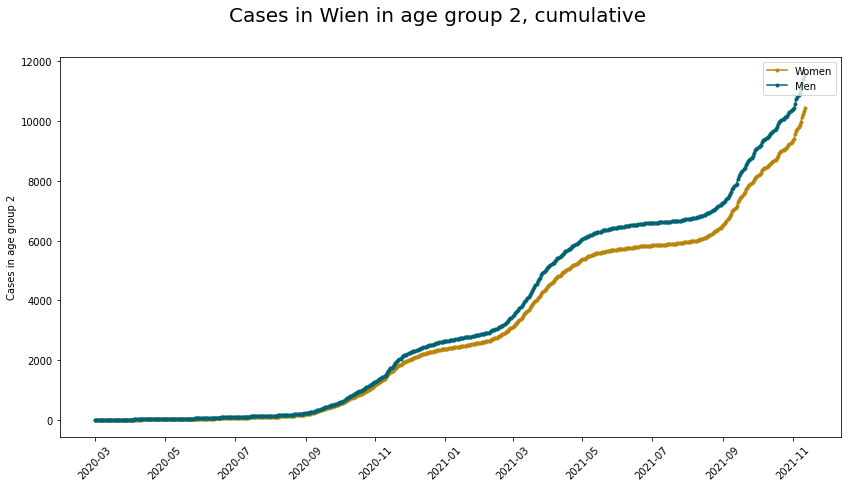

In [9]:
# Start and end of the date range to plot cumulative cases
start, end = '2020-03', '2021-11'
# Plot daily cases
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 7))
ax.plot(final_df_g.loc[start:end, 'Anzahl'], marker='.', linestyle='-', color = '#b8850a', label = 'Women')
ax.plot(final_df_b.loc[start:end, 'Anzahl'], marker='.', linestyle='-', color = '#006374', label = 'Men')
title = f"Cases in {bundesland} in age group {age_group}, cumulative"
yaxis = f"Cases in age group {age_group}"
ax.set_ylabel(yaxis)
ax.legend(loc='upper left')
ax.legend(loc='upper right')
ax.tick_params(axis='x', rotation=45)
fig.suptitle(title, fontsize = 20)
plt.show()

In [10]:
# Compute the centered 7-day rolling mean of row differences in men
final_df_b_7d_diff = final_df_b.Anzahl.diff().rolling(7, center=True).mean()

In [11]:
# Compute the centered 7-day rolling mean of row differences in women
final_df_g_7d_diff = final_df_g.Anzahl.diff().rolling(7, center=True).mean()

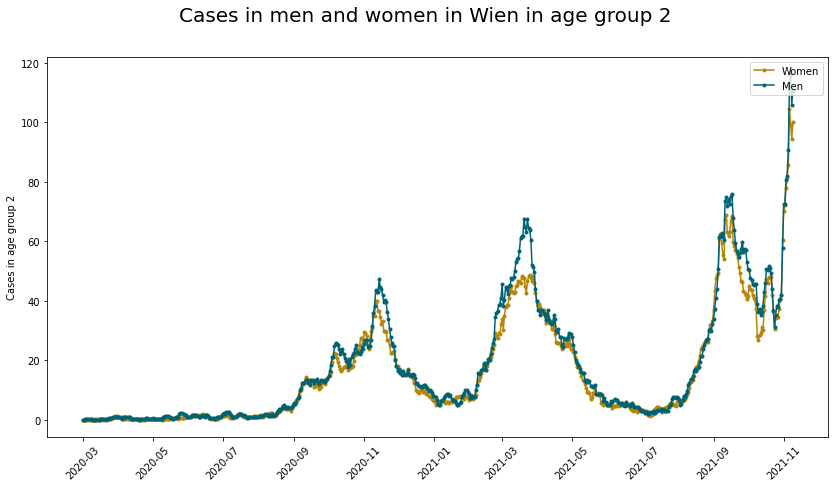

In [12]:
# Start and end of the date range to plot the rolling mean of cases (separately for each gender)
start, end = '2020-03', '2021-11'
# Plot daily cases
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 7))
ax.plot(final_df_g_7d_diff[start:end], marker='.', linestyle='-', color = '#b8850a', label = 'Women')
ax.plot(final_df_b_7d_diff[start:end], marker='.', linestyle='-', color = '#006374', label = 'Men')
title = f"Cases in men and women in {bundesland} in age group {age_group}"
yaxis = f"Cases in age group {age_group}"
ax.set_ylabel(yaxis)
ax.legend(loc='upper left')
ax.legend(loc='upper right')
ax.tick_params(axis='x', rotation=45)
fig.suptitle(title, fontsize = 20)
plt.show()

In [13]:
#Combine data for men and women
combined_data = final_df_b['Anzahl'] + final_df_g['Anzahl']

In [14]:
# Compute the centered 7-day rolling mean of row differences for cases (combined men and women)
combined_data_7d_diff = combined_data.diff().rolling(7, center=True).mean()

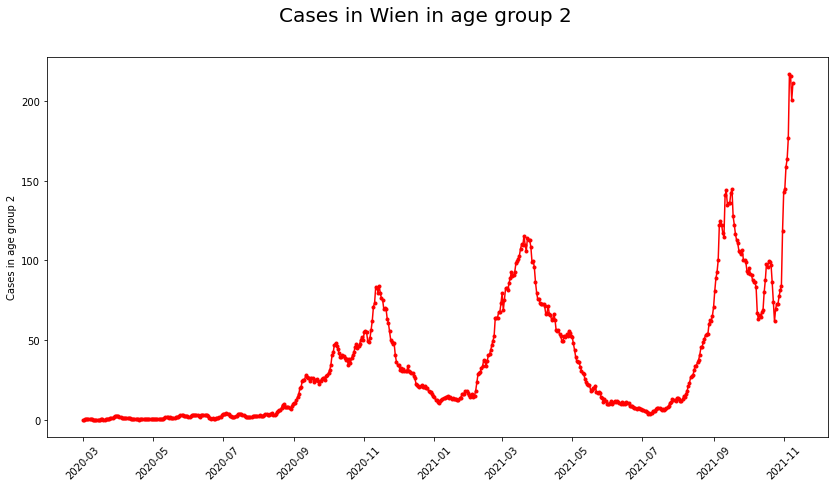

In [15]:
# Start and end of the date range to plot the rolling mean of combined cases
start, end = '2020-03', '2021-11'
# Plot daily cases
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 7))
ax.plot(combined_data_7d_diff[start:end], marker='.', linestyle='-', color = 'red')
title = f"Cases in {bundesland} in age group {age_group}"
yaxis = f"Cases in age group {age_group}"
ax.set_ylabel(yaxis)
ax.tick_params(axis='x', rotation=45)
fig.suptitle(title, fontsize = 20)
plt.show()